# Visualize Cell Line Similarity

In this notebook, we try to visualize cell line similarity and to show correlates.

In [1]:
from util import *

## Basic Cell Line UMAP

In [2]:
df, df_info = get_processed_data(drugs_as_features=True, impute=True)

First, let's see a basic UMAP plot of all the drugs.

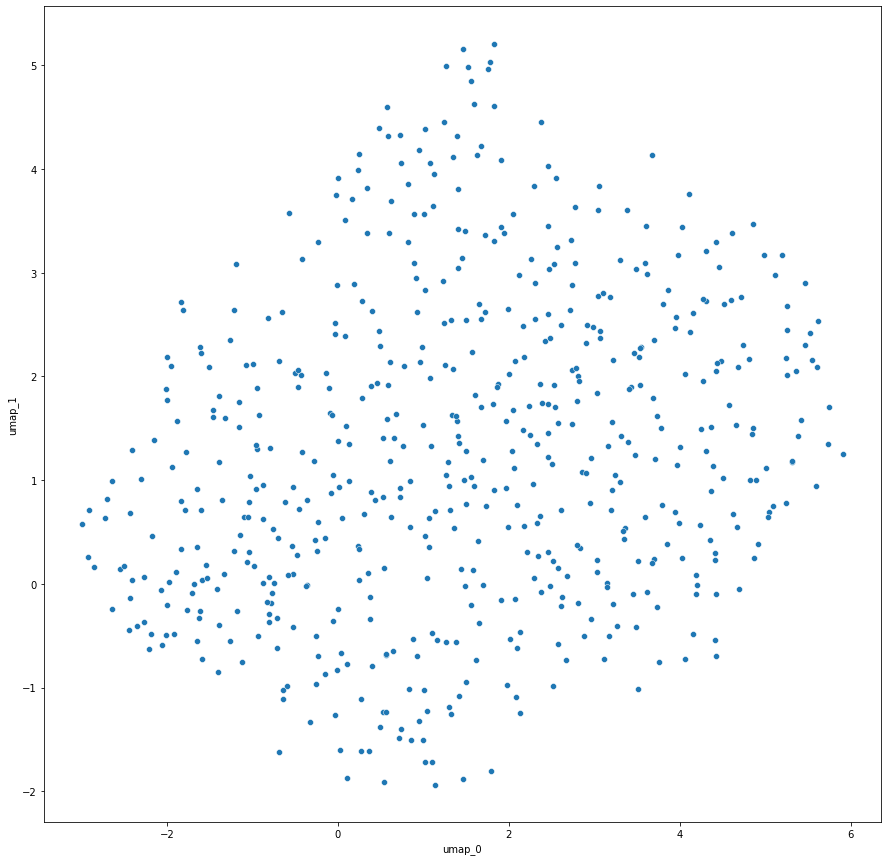

In [3]:
df_umap = run_umap(df)
draw_umap(df_umap)

## Pool-Colored UMAP

Now let's try coloring the UMAP by PRISM pool. We expect a pretty even spread of the pools, since the pool choice
is not expected to impact responses.

In [4]:
df_pool_info = get_pool_info()

# There are multiple pool IDs for different screens, but they're essentially duplicates, so use HTS
df_pool_info = df_pool_info[df_pool_info.screen_id == "HTS"]
df_pool = df.join(df_pool_info[["pool_id"]], how="left")

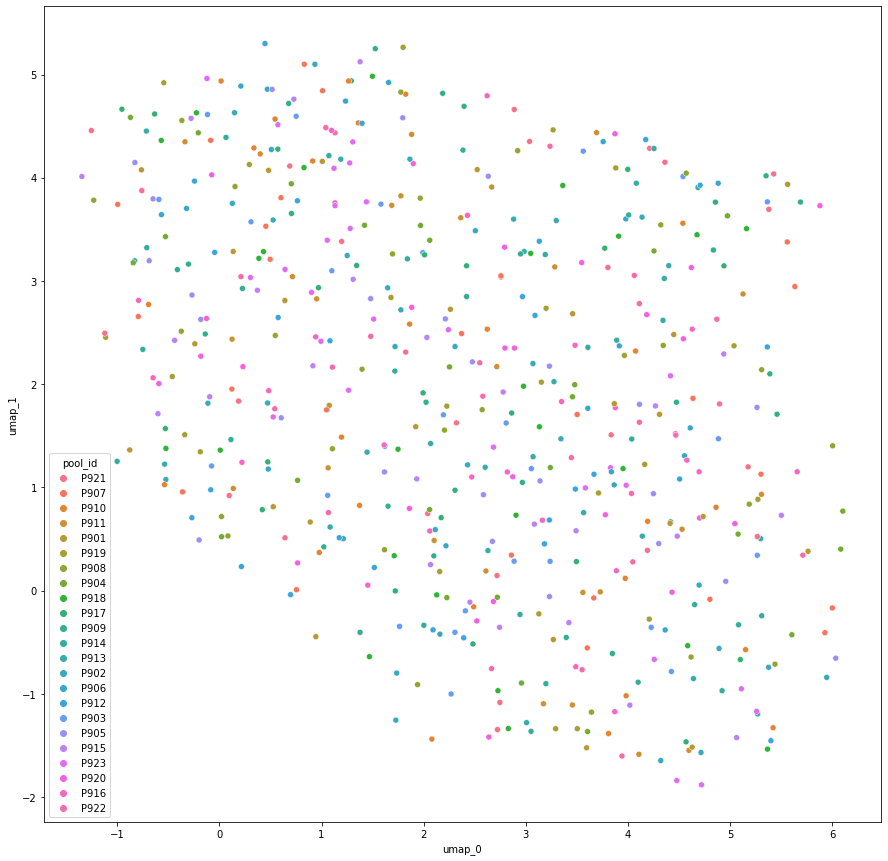

In [5]:
df_umap = run_umap(df_pool, extra_cols=["pool_id"])
draw_umap(df_umap, hue="pool_id")

## Primary Tissue Type-Colored UMAP

Do we see any patterns with primary tissue type?

In [6]:
df_cancer_type = df.join(df_info[["primary_tissue"]], how="left")
df_cancer_type.primary_tissue = df_cancer_type.primary_tissue.fillna("Unknown")

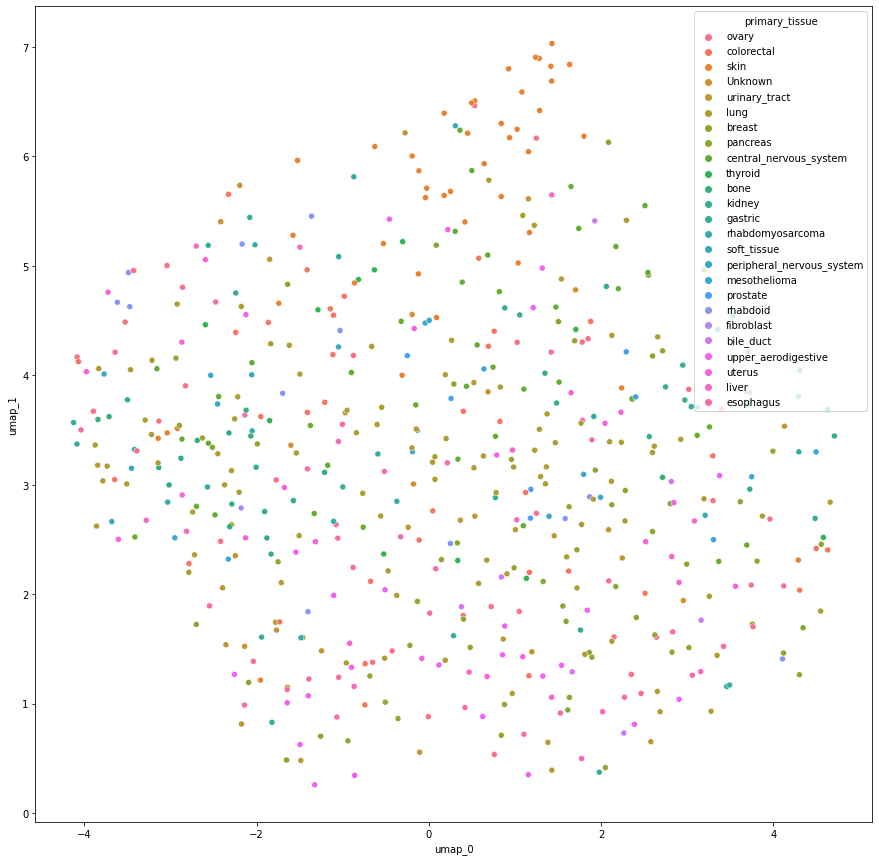

In [7]:
df_umap = run_umap(df_cancer_type, extra_cols=["primary_tissue"])
draw_umap(df_umap, hue="primary_tissue")

## Classification

Interesting that the tissue types aren't well-clustered. Some next steps:

* Run some classifiers to better understand the above findings.
* Instead of using all drugs as features, only use certain drugs.